In [51]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [53]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../..")

print('Current location: ', os.getcwd())

Current location:  /home/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


## Import dependencies

In [54]:
import os
from datetime import datetime, timezone

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from source.utils.custom_initializers import create_config_obj, read_model_metric_dfs
from source.custom_classes.data_loaders import CompasWithoutSensitiveAttrsDataset
from source.custom_classes.metrics_visualizer import MetricsVisualizer
from source.custom_classes.metrics_composer import MetricsComposer
from source.user_interfaces.metrics_computation_interfaces import compute_metrics_multiple_runs

## Create a config object

In [55]:
ROOT_DIR = os.path.join('docs', 'examples')
config_yaml_path = os.path.join(ROOT_DIR, 'experiment_compas_config.yaml')
config_yaml_content = """
dataset_name: COMPAS_Without_Sensitive_Attributes
test_set_fraction: 0.2
bootstrap_fraction: 0.8
n_estimators: 10
#runs_seed_lst: [100]
runs_seed_lst: [100, 200, 300, 400, 500, 600]
sensitive_attributes_dct: {'sex': 0, 'race': 'Caucasian', 'sex&race': None}
"""

with open(config_yaml_path, 'w', encoding='utf-8') as f:
    f.write(config_yaml_content)

In [56]:
config = create_config_obj(config_yaml_path=config_yaml_path)
# TODO: delete 'results' before this notebook execution
SAVE_RESULTS_DIR_PATH = os.path.join(ROOT_DIR, 'results',
                                     f'{config.dataset_name}_Metrics_{datetime.now(timezone.utc).strftime("%Y%m%d__%H%M%S")}')

## Create a models config

In [57]:
models_config = {
    'DecisionTreeClassifier': DecisionTreeClassifier(criterion='gini',
                                                     max_depth=20,
                                                     max_features=0.6,
                                                     min_samples_split=0.1),
    'LogisticRegression': LogisticRegression(C=1,
                                             max_iter=50,
                                             penalty='l2',
                                             solver='newton-cg'),
}

## Create a Dataset class

In [58]:
dataset = CompasWithoutSensitiveAttrsDataset(dataset_path='data/COMPAS.csv')
dataset.X_data.head()

,juv_fel_count,juv_misd_count,juv_other_count,priors_count,age_cat_25 - 45,age_cat_Greater than 45,age_cat_Less than 25,c_charge_degree_F,c_charge_degree_M
0,0.0,-2.340451,1.0,-15.010999,1,0,0,0,1
1,0.0,0.000000,0.0,0.000000,1,0,0,1,0
2,0.0,0.000000,0.0,0.000000,0,0,1,1,0
3,0.0,0.000000,0.0,6.000000,1,0,0,0,1
4,0.0,0.000000,0.0,7.513697,1,0,0,1,0


## Subgroup Metrics Computation

## Get metrics for a list of models with a run_metrics_computation_with_config interface and input arguments as a config

In [59]:
multiple_run_metrics_dct = compute_metrics_multiple_runs(dataset, config, models_config, SAVE_RESULTS_DIR_PATH, debug_mode=False)

Analyze models in one run:   0%|          | 0/2 [00:00<?, ?it/s]

##############################  [Model 1 / 2] Analyze DecisionTreeClassifier  ##############################
Model random_state:  101
Baseline X_train shape:  (4222, 9)
Baseline X_test shape:  (1056, 9)




2023-02-01 01:51:38 abstract_overall_variance_analyzer.py INFO    : Start classifiers testing by bootstrap


Classifiers testing by bootstrap: 100%|██████████| 10/10 [00:00<00:00, 178.24it/s]


2023-02-01 01:51:38 abstract_overall_variance_analyzer.py INFO    : Successfully tested classifiers by bootstrap
2023-02-01 01:51:38 abstract_overall_variance_analyzer.py INFO    : Successfully computed predict proba metrics

Analyze models in one run:  50%|█████     | 1/2 [00:01<00:01,  1.13s/it]





##############################  [Model 2 / 2] Analyze LogisticRegression  ##############################
Model random_state:  102
Baseline X_train shape:  (4222, 9)
Baseline X_test shape:  (1056, 9)




2023-02-01 01:51:39 abstract_overall_variance_analyzer.py INFO    : Start classifiers testing by bootstrap


Classifiers testing by bootstrap: 100%|██████████| 10/10 [00:00<00:00, 46.15it/s]


2023-02-01 01:51:39 abstract_overall_variance_analyzer.py INFO    : Successfully tested classifiers by bootstrap
2023-02-01 01:51:39 abstract_overall_variance_analyzer.py INFO    : Successfully computed predict proba metrics

Multiple runs progress:  33%|███▎      | 1/3 [00:02<00:04,  2.41s/it]


Analyze models in one run:   0%|          | 0/2 [00:00<?, ?it/s]

##############################  [Model 1 / 2] Analyze DecisionTreeClassifier  ##############################
Model random_state:  201
Baseline X_train shape:  (4222, 9)
Baseline X_test shape:  (1056, 9)




2023-02-01 01:51:40 abstract_overall_variance_analyzer.py INFO    : Start classifiers testing by bootstrap


Classifiers testing by bootstrap: 100%|██████████| 10/10 [00:00<00:00, 188.34it/s]


2023-02-01 01:51:40 abstract_overall_variance_analyzer.py INFO    : Successfully tested classifiers by bootstrap
2023-02-01 01:51:40 abstract_overall_variance_analyzer.py INFO    : Successfully computed predict proba metrics

Analyze models in one run:  50%|█████     | 1/2 [00:01<00:01,  1.07s/it]





##############################  [Model 2 / 2] Analyze LogisticRegression  ##############################
Model random_state:  202
Baseline X_train shape:  (4222, 9)
Baseline X_test shape:  (1056, 9)




2023-02-01 01:51:41 abstract_overall_variance_analyzer.py INFO    : Start classifiers testing by bootstrap


Classifiers testing by bootstrap: 100%|██████████| 10/10 [00:00<00:00, 18.57it/s]


2023-02-01 01:51:42 abstract_overall_variance_analyzer.py INFO    : Successfully tested classifiers by bootstrap
2023-02-01 01:51:42 abstract_overall_variance_analyzer.py INFO    : Successfully computed predict proba metrics

Multiple runs progress:  67%|██████▋   | 2/3 [00:05<00:02,  2.56s/it]


Analyze models in one run:   0%|          | 0/2 [00:00<?, ?it/s]

##############################  [Model 1 / 2] Analyze DecisionTreeClassifier  ##############################
Model random_state:  301
Baseline X_train shape:  (4222, 9)
Baseline X_test shape:  (1056, 9)




2023-02-01 01:51:43 abstract_overall_variance_analyzer.py INFO    : Start classifiers testing by bootstrap


Classifiers testing by bootstrap: 100%|██████████| 10/10 [00:00<00:00, 229.24it/s]


2023-02-01 01:51:43 abstract_overall_variance_analyzer.py INFO    : Successfully tested classifiers by bootstrap
2023-02-01 01:51:43 abstract_overall_variance_analyzer.py INFO    : Successfully computed predict proba metrics

Analyze models in one run:  50%|█████     | 1/2 [00:01<00:01,  1.00s/it]





##############################  [Model 2 / 2] Analyze LogisticRegression  ##############################
Model random_state:  302
Baseline X_train shape:  (4222, 9)
Baseline X_test shape:  (1056, 9)




2023-02-01 01:51:44 abstract_overall_variance_analyzer.py INFO    : Start classifiers testing by bootstrap


Classifiers testing by bootstrap: 100%|██████████| 10/10 [00:00<00:00, 44.85it/s]


2023-02-01 01:51:44 abstract_overall_variance_analyzer.py INFO    : Successfully tested classifiers by bootstrap
2023-02-01 01:51:44 abstract_overall_variance_analyzer.py INFO    : Successfully computed predict proba metrics

Multiple runs progress: 100%|██████████| 3/3 [00:07<00:00,  2.42s/it]

In [60]:
multiple_run_metrics_dct[list(models_config.keys())[0]].head(20)

,Metric,overall,sex_priv,sex_dis,race_priv,race_dis,sex&race_priv,sex&race_dis,Model_Seed,Model_Name,Run_Number
0,Mean,0.524703,0.566947,0.514893,0.592122,0.478935,0.594704,0.464791,101,DecisionTreeClassifier,Run_1
1,Std,0.068383,0.083475,0.064879,0.067544,0.068953,0.091075,0.067132,101,DecisionTreeClassifier,Run_1
2,IQR,0.077179,0.085361,0.075280,0.075003,0.078657,0.087413,0.077569,101,DecisionTreeClassifier,Run_1
3,Entropy,0.000000,0.000000,0.000000,0.000000,0.193654,0.000000,0.184195,101,DecisionTreeClassifier,Run_1
4,Jitter,0.132534,0.168286,0.124232,0.119022,0.141706,0.156566,0.134020,101,DecisionTreeClassifier,Run_1
5,Per_Sample_Accuracy,0.664773,0.663819,0.664994,0.652225,0.673291,0.620455,0.667954,101,DecisionTreeClassifier,Run_1
6,Label_Stability,0.823485,0.769849,0.835939,0.840281,0.812083,0.790909,0.824710,101,DecisionTreeClassifier,Run_1
7,TPR,0.613963,0.500000,0.633094,0.433962,0.701220,0.280000,0.713781,101,DecisionTreeClassifier,Run_1
8,TNR,0.722320,0.759690,0.711364,0.798507,0.654485,0.761905,0.625532,101,DecisionTreeClassifier,Run_1
9,PPV,0.654267,0.530303,0.675192,0.560976,0.688623,0.318182,0.696552,101,DecisionTreeClassifier,Run_1


## Group Metrics Composition

In [61]:
models_metrics_dct = read_model_metric_dfs(SAVE_RESULTS_DIR_PATH, model_names=list(models_config.keys()))

In [62]:
metrics_composer = MetricsComposer(models_metrics_dct, config.sensitive_attributes_dct)

In [63]:
models_composed_metrics_df = metrics_composer.compose_metrics()

## Metrics Visualizations and Reporting

In [64]:
visualizer = MetricsVisualizer(models_metrics_dct, models_composed_metrics_df, config.dataset_name,
                               model_names=list(models_config.keys()),
                               sensitive_attributes_dct=config.sensitive_attributes_dct)

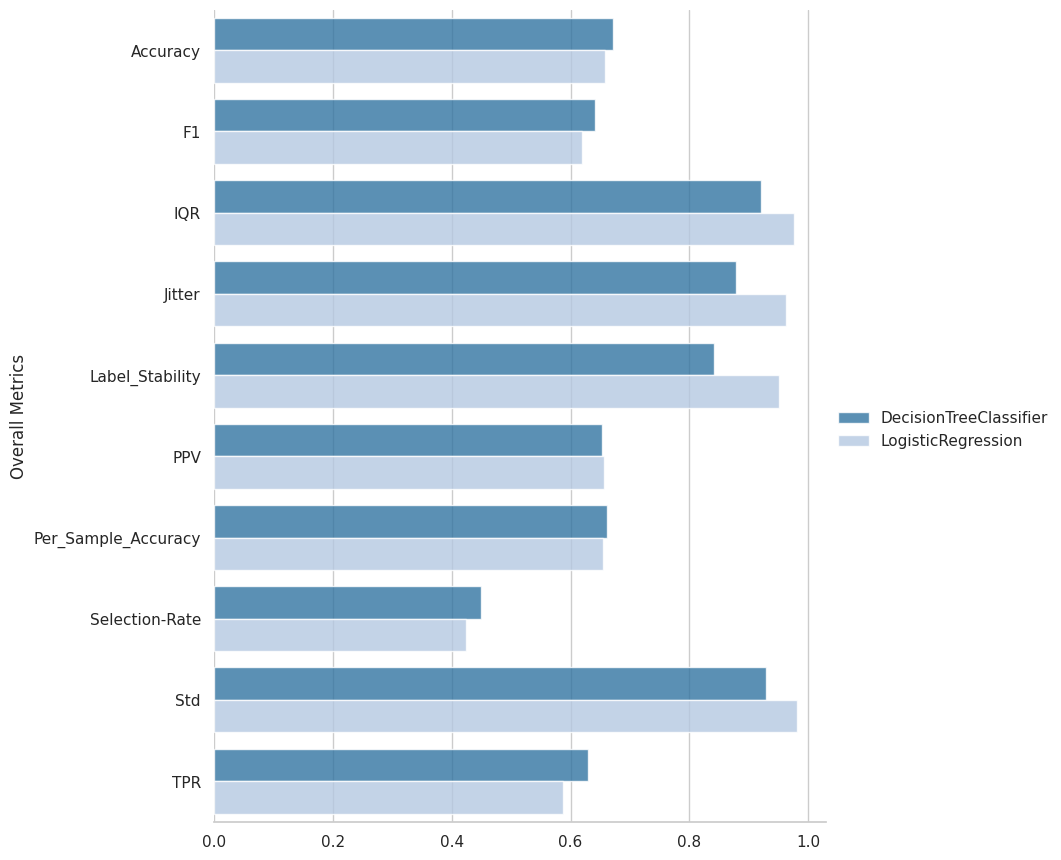

In [65]:
visualizer.visualize_overall_metrics(
    metrics_names=['TPR', 'PPV', 'Accuracy', 'F1', 'Selection-Rate',
                   'Per_Sample_Accuracy', 'Label_Stability'],
    reversed_metrics_names=['Std', 'IQR', 'Jitter'],
    x_label="Overall Metrics"
)

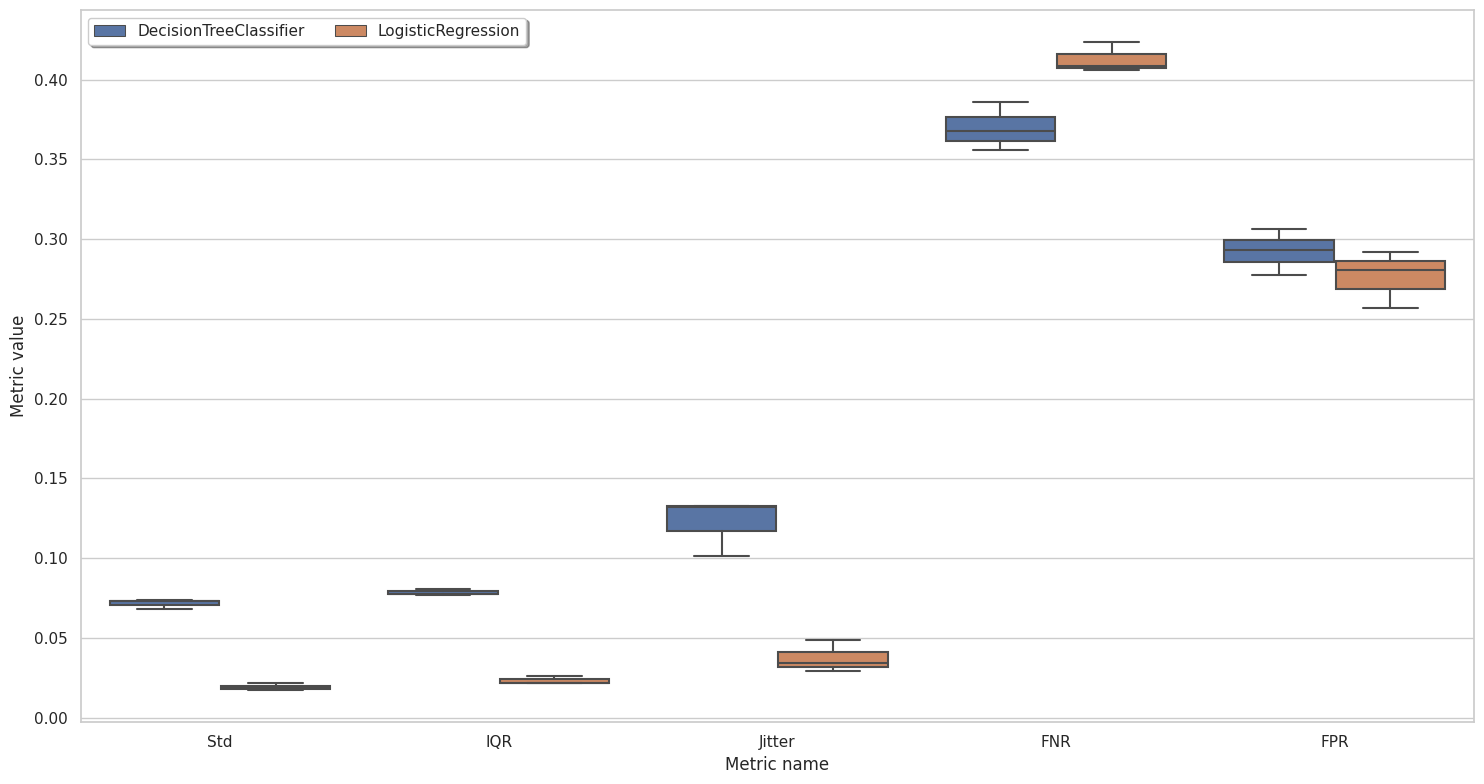

In [66]:
visualizer.create_boxes_and_whiskers_for_models_multiple_runs(metrics_lst=['Std', 'IQR', 'Jitter', 'FNR','FPR'])

In [67]:
# visualizer.create_html_report(report_save_path=os.path.join(ROOT_DIR, "results", "reports"))